### Importing Libraries

In [24]:
import mysql.connector
import matplotlib.pyplot as plt
import plotly.express as pt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_1samp

### Connecting to SQL

In [25]:
employeeRecordsDatabase = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "IshuLogi@9702",
    database = "employeerecordsdb"
)

employeeRecordsDatabase

### Fetching Data from SQL

In [26]:
databaseFetchRecords = employeeRecordsDatabase.cursor()
databaseFetchRecords.execute("SELECT * FROM employeerecordsfinalview")
result = databaseFetchRecords.fetchall()

for i in result:
    print(i)

(206, 'William', 'Gietz', 'WGIETZ', '51hr5.123.8181', datetime.date(1994, 6, 7), Decimal('8300.00'), None, 'Public Accountant', Decimal('4200'), Decimal('9000'), 'Accounting', 'Shelley', None, None, '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'United States of America', 'Americas')
(205, 'Shelley', 'Higgins', 'SHIGGINS', '515.123.8080', datetime.date(1994, 6, 7), Decimal('12000.00'), None, 'Accounting Manager', Decimal('8200'), Decimal('16000'), 'Accounting', 'Neena', None, None, '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'United States of America', 'Americas')
(200, 'Jennifer', 'Whalen', 'JWHALEN', '515.123.4444', datetime.date(1987, 9, 17), Decimal('4400.00'), None, 'Administration Assistant', Decimal('3000'), Decimal('6000'), 'Administration', 'Neena', datetime.date(1987, 9, 17), datetime.date(1998, 12, 31), '2004 Charade Rd', '98199', 'Seattle', 'Washington', 'United States of America', 'Americas')
(100, 'Steven', 'King', 'SKING', '515.123.4567', datetime.date(19

### Fetching Column Names

In [27]:
databaseFetchRecords.description

[('employee_id', 3, None, None, None, None, 0, 36897, 63),
 ('first_name', 253, None, None, None, None, 1, 0, 255),
 ('last_name', 253, None, None, None, None, 0, 4097, 255),
 ('email', 253, None, None, None, None, 0, 4097, 255),
 ('phone_number', 253, None, None, None, None, 1, 0, 255),
 ('hire_date', 10, None, None, None, None, 0, 4225, 63),
 ('salary', 246, None, None, None, None, 0, 36865, 63),
 ('commission_pct', 246, None, None, None, None, 1, 32768, 63),
 ('job_title', 253, None, None, None, None, 0, 4097, 255),
 ('min_salary', 246, None, None, None, None, 1, 32800, 63),
 ('max_salary', 246, None, None, None, None, 1, 32800, 63),
 ('department_name', 253, None, None, None, None, 1, 4096, 255),
 ('manager_name', 253, None, None, None, None, 1, 0, 255),
 ('prev_employment_start_date', 10, None, None, None, None, 1, 4224, 63),
 ('prev_employment_end_date', 10, None, None, None, None, 1, 4224, 63),
 ('street_address', 253, None, None, None, None, 1, 0, 255),
 ('postal_code', 253, No

### Creating Dataframe

In [28]:
import pandas as pd

columnNames = [i[0] for i in databaseFetchRecords.description]

# print(columnNames)

employeeRecordsDataframe = pd.DataFrame(result, columns = columnNames)

employeeRecordsDataframe

,employee_id,first_name,last_name,email,phone_number,hire_date,salary,commission_pct,job_title,min_salary,...,department_name,manager_name,prev_employment_start_date,prev_employment_end_date,street_address,postal_code,city,state_province,country_name,region_name
0,206,William,Gietz,WGIETZ,51hr5.123.8181,1994-06-07,8300.00,None,Public Accountant,4200,...,Accounting,Shelley,None,None,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
1,205,Shelley,Higgins,SHIGGINS,515.123.8080,1994-06-07,12000.00,None,Accounting Manager,8200,...,Accounting,Neena,None,None,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,1987-09-17,4400.00,None,Administration Assistant,3000,...,Administration,Neena,1987-09-17,1998-12-31,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
3,100,Steven,King,SKING,515.123.4567,1987-06-17,24000.00,None,President,20000,...,Executive,None,None,None,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
4,101,Neena,Kochhar,NKOCHHAR,515.123.4568,1989-09-21,17000.00,None,Administration Vice President,15000,...,Executive,Steven,1989-09-21,1997-03-15,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,120,Matthew,Weiss,MWEISS,650.123.1234,1996-07-18,8000.00,None,Stock Manager,5500,...,Shipping,Steven,None,None,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
103,121,Adam,Fripp,AFRIPP,650.123.2234,1997-04-10,8200.00,None,Stock Manager,5500,...,Shipping,Steven,None,None,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
104,122,Payam,Kaufling,PKAUFLIN,650.123.3234,1995-05-01,7900.00,None,Stock Manager,5500,...,Shipping,Steven,1999-01-01,1999-12-31,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
105,123,Shanta,Vollman,SVOLLMAN,650.123.4234,1997-10-10,6500.00,None,Stock Manager,5500,...,Shipping,Steven,None,None,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas


### Converting Dataframe to CSV File

In [29]:
employeeRecordsDataframe.to_csv("EmployeeRecords.csv")

In [30]:
employeeRecordsDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   employee_id                 107 non-null    int64 
 1   first_name                  107 non-null    object
 2   last_name                   107 non-null    object
 3   email                       107 non-null    object
 4   phone_number                107 non-null    object
 5   hire_date                   107 non-null    object
 6   salary                      107 non-null    object
 7   commission_pct              35 non-null     object
 8   job_title                   107 non-null    object
 9   min_salary                  107 non-null    object
 10  max_salary                  107 non-null    object
 11  department_name             106 non-null    object
 12  manager_name                106 non-null    object
 13  prev_employment_start_date  7 non-null      object

### Retrieving the Column Names

In [31]:
employeeRecordsDataframe.columns

Index(['employee_id', 'first_name', 'last_name', 'email', 'phone_number',
       'hire_date', 'salary', 'commission_pct', 'job_title', 'min_salary',
       'max_salary', 'department_name', 'manager_name',
       'prev_employment_start_date', 'prev_employment_end_date',
       'street_address', 'postal_code', 'city', 'state_province',
       'country_name', 'region_name'],
      dtype='object')

### Dropping Columns

In [20]:

employeeRecordsDataframe = employeeRecordsDataframe.drop(['phone_number', 'commission_pct', 'prev_employment_start_date', 'prev_employment_end_date', 'street_address', 'postal_code'], axis = 1)

### Check Null Values

In [32]:
# employeeRecordsDataframe

# employeeRecordsDataframe.isnull().any()
print(employeeRecordsDataframe.isnull().sum())
employeeRecordsDataframe[pd.isna(employeeRecordsDataframe['state_province'])]

employee_id                     0
first_name                      0
last_name                       0
email                           0
phone_number                    0
hire_date                       0
salary                          0
commission_pct                 72
job_title                       0
min_salary                      0
max_salary                      0
department_name                 1
manager_name                    1
prev_employment_start_date    100
prev_employment_end_date      100
street_address                  1
postal_code                     2
city                            1
state_province                  2
country_name                    1
region_name                     1
dtype: int64


,employee_id,first_name,last_name,email,phone_number,hire_date,salary,commission_pct,job_title,min_salary,...,department_name,manager_name,prev_employment_start_date,prev_employment_end_date,street_address,postal_code,city,state_province,country_name,region_name
12,203,Susan,Mavris,SMAVRIS,515.123.7777,1994-06-07,6500.00,None,Human Resources Representative,4000,...,Human Resources,Neena,None,None,8204 Arthur St,None,London,None,United Kingdom,Europe
60,178,Kimberely,Grant,KGRANT,011.44.1644.429263,1999-05-24,7000.00,0.15,Sales Representative,6000,...,None,Eleni,None,None,None,None,None,None,None,None


### Replacing Null Values

In [22]:
employeeRecordsDataframe.loc[employeeRecordsDataframe['employee_id'] == 178, ['department_name', 'city', 'country_name', 'state_province', 'region_name']] = ["Sales", "Oxford", "United Kingdon", "Oxford", "Europe"]
employeeRecordsDataframe.loc[employeeRecordsDataframe['employee_id'] == 100, 'manager_name'] = "No Manager"
employeeRecordsDataframe.loc[employeeRecordsDataframe['employee_id'] == 203, 'state_province'] = "Greater London"

print(employeeRecordsDataframe.isnull().sum())

employee_id        0
first_name         0
last_name          0
email              0
hire_date          0
salary             0
job_title          0
min_salary         0
max_salary         0
department_name    0
manager_name       0
city               0
state_province     0
country_name       0
region_name        0
dtype: int64


### Unique Values of Certain Columns

In [23]:
columns_to_check = ["job_title","department_name",	
	"state_province","country_name","region_name"]

# Iterate over each column and print unique values
for column in columns_to_check:
    unique_values = employeeRecordsDataframe[column].unique()
    print(f'Unique values in {column}: {unique_values}\n')

Unique values in job_title: ['Public Accountant' 'Accounting Manager' 'Administration Assistant'
 'President' 'Administration Vice President' 'Accountant'
 'Finance Manager' 'Human Resources Representative' 'Programmer'
 'Marketing Manager' 'Marketing Representative'
 'Public Relations Representative' 'Purchasing Clerk' 'Purchasing Manager'
 'Sales Manager' 'Sales Representative' 'Shipping Clerk' 'Stock Clerk'
 'Stock Manager']

Unique values in department_name: ['Accounting' 'Administration' 'Executive' 'Finance' 'Human Resources'
 'IT' 'Marketing' 'Public Relations' 'Purchasing' 'Sales' 'Shipping']

Unique values in state_province: ['Washington' 'Greater London' 'Texas' 'Ontario' 'Bavaria' 'Oxford'
 'California']

Unique values in country_name: ['United States of America' 'United Kingdom' 'Canada' 'Germany'
 'United Kingdon']

Unique values in region_name: ['Americas' 'Europe']



### Sort Values by Ascending Order

In [113]:
employeeRecordsDataframe = employeeRecordsDataframe.sort_values(by = 'employee_id', ascending = True)
employeeRecordsDataframe

,employee_id,first_name,last_name,email,hire_date,salary,job_title,min_salary,max_salary,department_name,manager_name,city,state_province,country_name,region_name
3,100,Steven,King,SKING,1987-06-17,24000.00,President,20000,40000,Executive,None,Seattle,Washington,United States of America,Americas
4,101,Neena,Kochhar,NKOCHHAR,1989-09-21,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas
5,102,Lex,De Haan,LDEHAAN,1993-01-13,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas
13,103,Alexander,Hunold,AHUNOLD,1990-01-03,9000.00,Programmer,4000,10000,IT,Lex,Southlake,Texas,United States of America,Americas
14,104,Bruce,Ernst,BERNST,1991-05-21,6000.00,Programmer,4000,10000,IT,Alexander,Southlake,Texas,United States of America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,202,Pat,Fay,PFAY,1997-08-17,6000.00,Marketing Representative,4000,9000,Marketing,Michael,Toronto,Ontario,Canada,Americas
12,203,Susan,Mavris,SMAVRIS,1994-06-07,6500.00,Human Resources Representative,4000,9000,Human Resources,Neena,London,None,United Kingdom,Europe
20,204,Hermann,Baer,HBAER,1994-06-07,10000.00,Public Relations Representative,4500,10500,Public Relations,Neena,Munich,Bavaria,Germany,Europe
1,205,Shelley,Higgins,SHIGGINS,1994-06-07,12000.00,Accounting Manager,8200,16000,Accounting,Neena,Seattle,Washington,United States of America,Americas


In [114]:
print("Min of Minimum Salary:", employeeRecordsDataframe['min_salary'].min())
print("Min of Maximum Salary:", employeeRecordsDataframe['min_salary'].max())

Min of Minimum Salary: 2000
Min of Maximum Salary: 20000


In [115]:
print("Max of Minimum Salary:", employeeRecordsDataframe['max_salary'].min())
print("Max of Maximum Salary:", employeeRecordsDataframe['max_salary'].max())

Max of Minimum Salary: 5000
Max of Maximum Salary: 40000


### Binning Minimum Salary Values

In [116]:
bins = [1000, 5000, 10000, 15000, 20000]

labels = ['1k-5k', '5k-10k', '10k-15k', '15k-20k']

employeeRecordsDataframe['Minimum Salary Category'] = pd.cut(employeeRecordsDataframe['min_salary'], bins = bins, labels = labels)

employeeRecordsDataframe.head(5)

,employee_id,first_name,last_name,email,hire_date,salary,job_title,min_salary,max_salary,department_name,manager_name,city,state_province,country_name,region_name,Minimum Salary Category
3,100,Steven,King,SKING,1987-06-17,24000.00,President,20000,40000,Executive,None,Seattle,Washington,United States of America,Americas,15k-20k
4,101,Neena,Kochhar,NKOCHHAR,1989-09-21,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas,10k-15k
5,102,Lex,De Haan,LDEHAAN,1993-01-13,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas,10k-15k
13,103,Alexander,Hunold,AHUNOLD,1990-01-03,9000.00,Programmer,4000,10000,IT,Lex,Southlake,Texas,United States of America,Americas,1k-5k
14,104,Bruce,Ernst,BERNST,1991-05-21,6000.00,Programmer,4000,10000,IT,Alexander,Southlake,Texas,United States of America,Americas,1k-5k


### Binning Maximum Salary Values

In [117]:
bins = [4000, 10000, 20000, 30000, 40000]

labels = ['4k-10k', '10k-20k', '20k-30k', '30k-40k']

employeeRecordsDataframe['Maximum Salary Category'] = pd.cut(employeeRecordsDataframe['max_salary'], bins = bins, labels = labels)

employeeRecordsDataframe.head(5)

,employee_id,first_name,last_name,email,hire_date,salary,job_title,min_salary,max_salary,department_name,manager_name,city,state_province,country_name,region_name,Minimum Salary Category,Maximum Salary Category
3,100,Steven,King,SKING,1987-06-17,24000.00,President,20000,40000,Executive,None,Seattle,Washington,United States of America,Americas,15k-20k,30k-40k
4,101,Neena,Kochhar,NKOCHHAR,1989-09-21,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas,10k-15k,20k-30k
5,102,Lex,De Haan,LDEHAAN,1993-01-13,17000.00,Administration Vice President,15000,30000,Executive,Steven,Seattle,Washington,United States of America,Americas,10k-15k,20k-30k
13,103,Alexander,Hunold,AHUNOLD,1990-01-03,9000.00,Programmer,4000,10000,IT,Lex,Southlake,Texas,United States of America,Americas,1k-5k,4k-10k
14,104,Bruce,Ernst,BERNST,1991-05-21,6000.00,Programmer,4000,10000,IT,Alexander,Southlake,Texas,United States of America,Americas,1k-5k,4k-10k


### Converting DataType

In [118]:
employeeRecordsDataframe['hire_date'] = pd.to_datetime(employeeRecordsDataframe['hire_date'])

In [119]:
employeeRecordsDataframe['salary'] = employeeRecordsDataframe['salary'].astype('int')

In [120]:
employeeRecordsDataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 3 to 0
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   employee_id              107 non-null    int64         
 1   first_name               107 non-null    object        
 2   last_name                107 non-null    object        
 3   email                    107 non-null    object        
 4   hire_date                107 non-null    datetime64[ns]
 5   salary                   107 non-null    int32         
 6   job_title                107 non-null    object        
 7   min_salary               107 non-null    object        
 8   max_salary               107 non-null    object        
 9   department_name          106 non-null    object        
 10  manager_name             106 non-null    object        
 11  city                     106 non-null    object        
 12  state_province           105 non-null    ob

### Extracting Year From Hire Year

In [121]:
employeeRecordsDataframe['Hire Year'] = employeeRecordsDataframe['hire_date'].dt.year

### Average Salary by Country

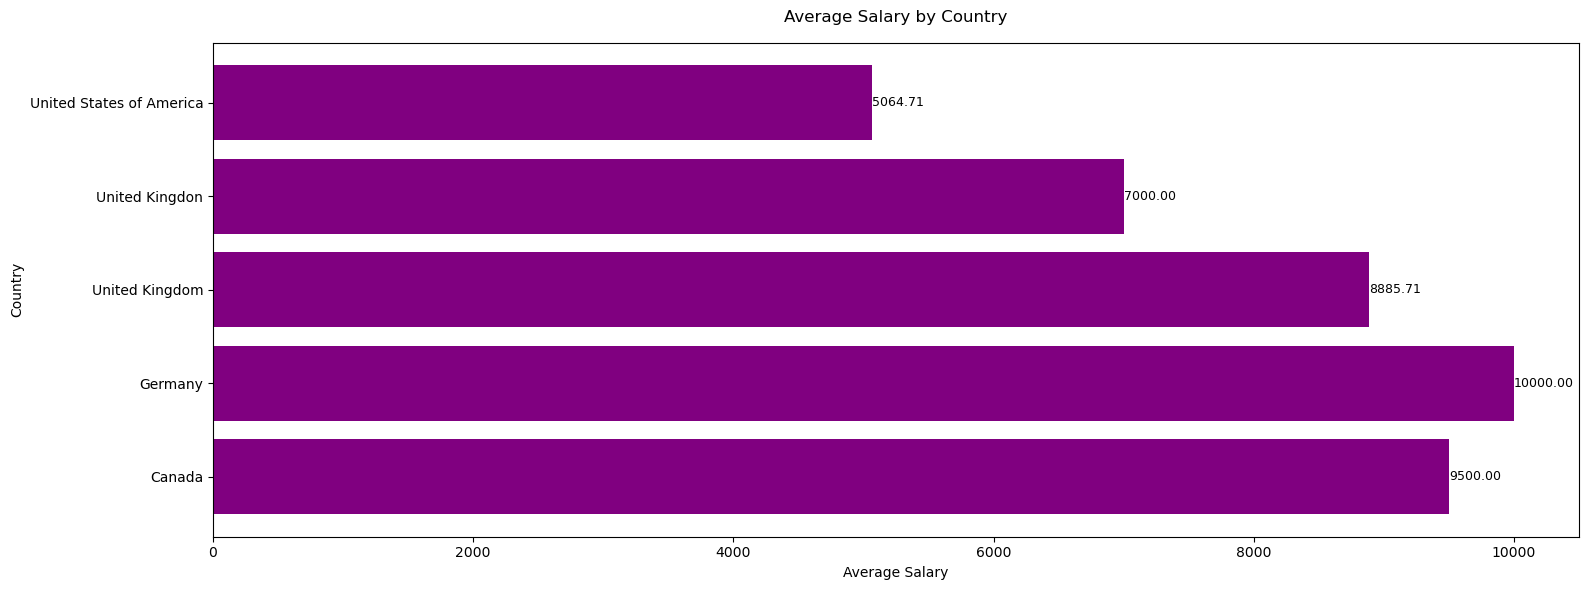

In [124]:
salary_by_country = employeeRecordsDataframe.groupby('country_name')['salary'].mean().reset_index()
plt.figure(figsize=(16, 6))

# Creating the horizontal bar plot
bars = plt.barh(
    salary_by_country['country_name'], 
    salary_by_country['salary'],
    color='purple'
)

# Adding labels and title
plt.xlabel('Average Salary',fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.title('Average Salary by Country', weight = 'light', fontsize=12, pad = 15)

# Adding bar labels
for bar in bars:
    width = bar.get_width()  # Get the width of the bar
    plt.text(
        width,  # X position of the label (end of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position of the label (middle of the bar)
        f'{width:.2f}',  # Label text (formatted to 2 decimal places)
        va='center',  # Vertical alignment
        ha='left',    # Horizontal alignment
        fontsize=9,
        color='black'
    )

# Display the plot
plt.tight_layout()
plt.show()

### Employee Count by Department using Bar plot

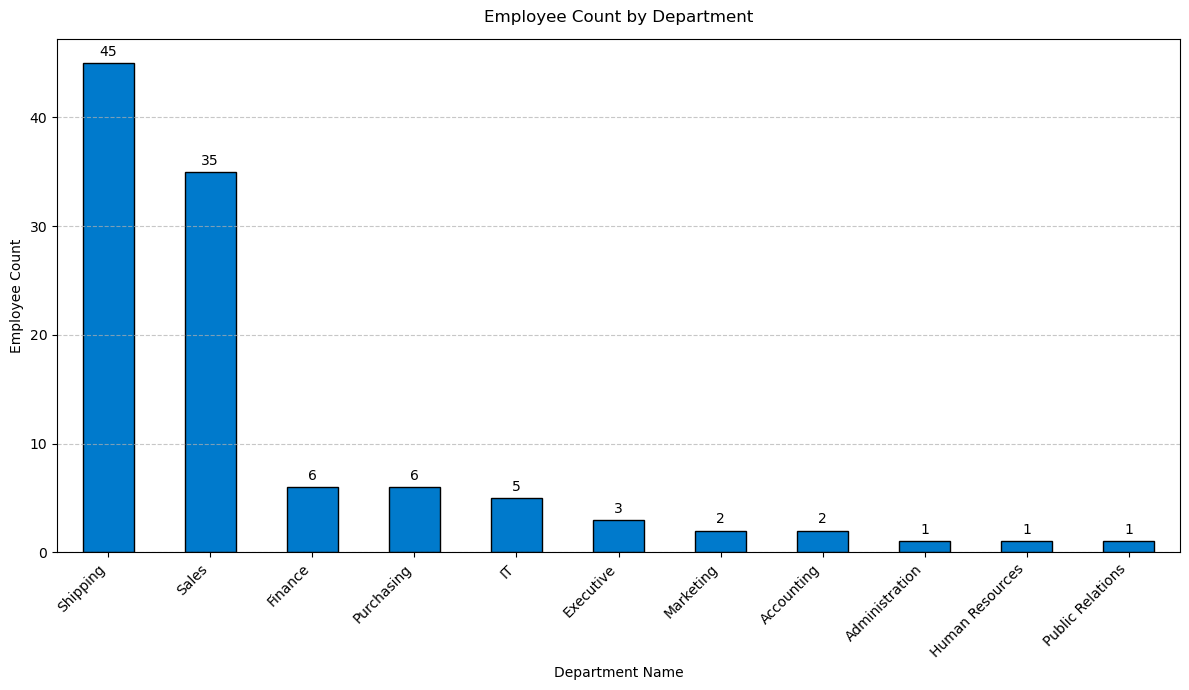

In [125]:
# Plotting the bar chart with improved visualization
ax = employeeRecordsDataframe['department_name'].value_counts().plot(kind='bar', color='#007acc', figsize=(12, 7), edgecolor='black')

# Adding title and labels
ax.set_title('Employee Count by Department', fontsize=12, fontweight='light', pad = 12)
ax.set_xlabel('Department Name', fontsize=10)
ax.set_ylabel('Employee Count', fontsize=10)

# Adding bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

# Rotating x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


### Distribution of Salaries: A Histogram Overview

C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



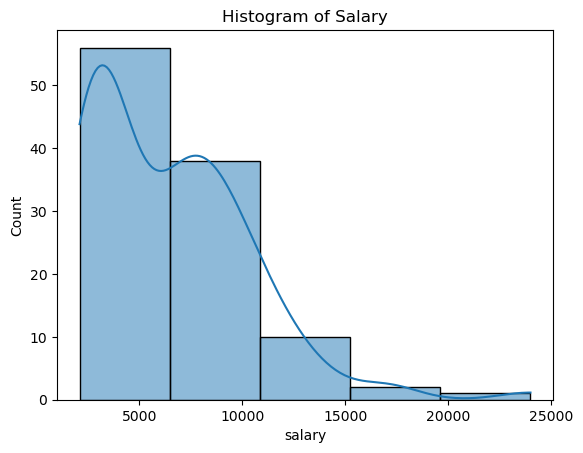

In [126]:
sns.histplot(employeeRecordsDataframe['salary'], bins = 5, kde = True)
plt.title('Histogram of Salary')
plt.show()

### Calculate Average Salary by Department using Point Plot

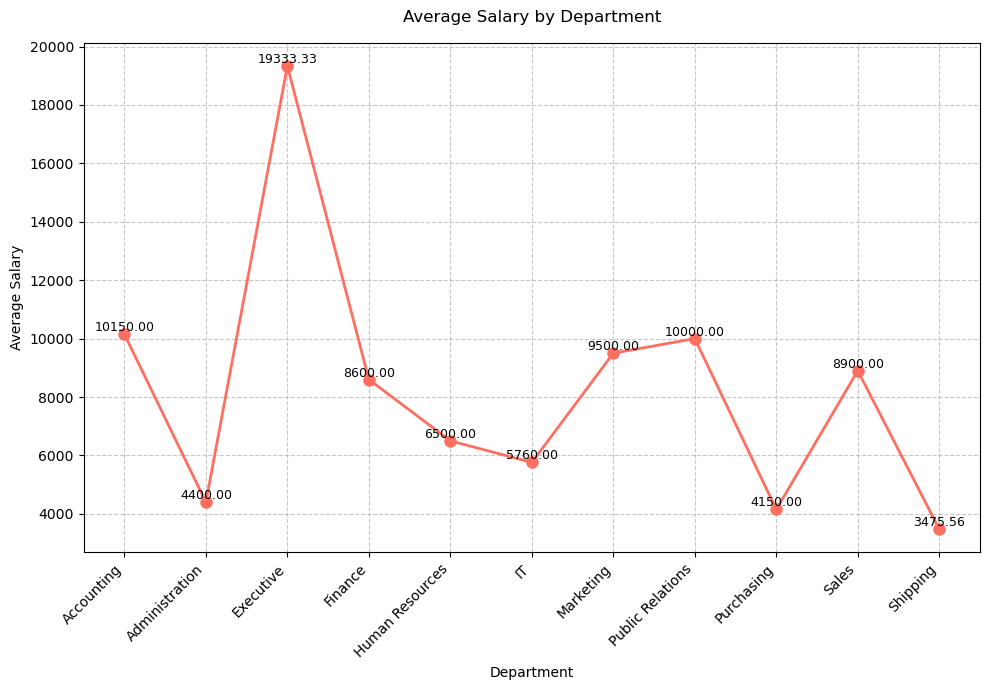

In [127]:
# Aggregating data: Calculate average salary by department
salary_by_department = employeeRecordsDataframe.groupby('department_name')['salary'].mean().reset_index()

plt.figure(figsize=(10, 7))

# Creating the line plot
plt.plot(
    salary_by_department['department_name'], 
    salary_by_department['salary'],
    color='#ff6f61',  # Line color
    marker='o',  # Marker style
    markersize=8,  # Marker size
    linewidth=2  # Line width
)

# Adding labels and title
plt.xlabel('Department', fontsize=10)
plt.ylabel('Average Salary', fontsize=10)
plt.title('Average Salary by Department', weight='light', fontsize=12, pad = 15)

# Adding annotations to each data point
for i, row in salary_by_department.iterrows():
    plt.text(
        row['department_name'], 
        row['salary'], 
        f'{row["salary"]:.2f}',  # Format value to 2 decimal places
        ha='center', 
        va='bottom', 
        fontsize=9, 
        color='black'
    )
    
# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### Correlation between Features using Heatmap

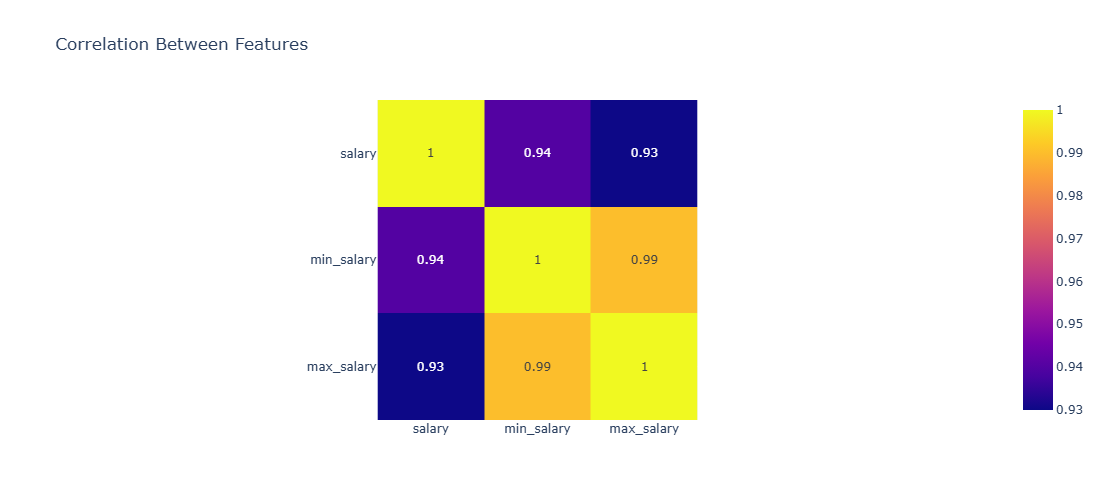

<Figure size 600x400 with 0 Axes>

In [128]:
# Selecting numeric columns for correlation analysis
numeric_columns = ['salary', 'min_salary', 'max_salary']

# Compute the correlation matrix
correlation_matrix = employeeRecordsDataframe[numeric_columns].corr().round(2)

# Create the heatmap with a different color palette (e.g., 'viridis')
plt.figure(figsize=(6, 4))
fig = pt.imshow(correlation_matrix, text_auto = True, title = "Correlation Between Features")
fig.layout.width = 900
fig.layout.height = 500
fig.show()

### Number of Hires by Year

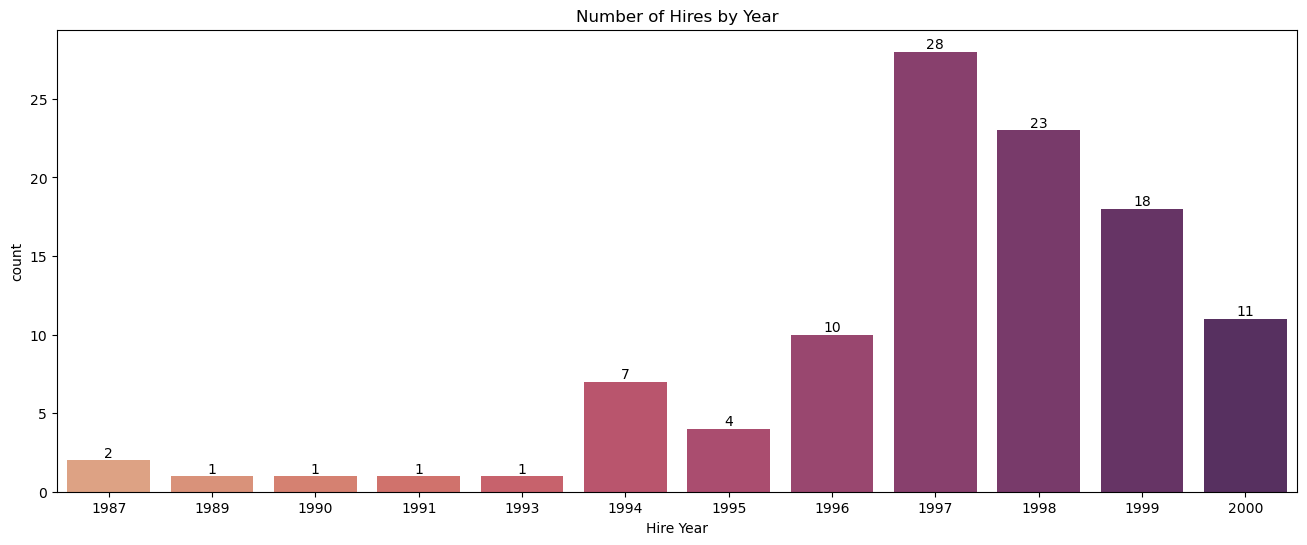

In [129]:
plt.figure(figsize = (16, 6))
ax = sns.countplot(data = employeeRecordsDataframe, x = "Hire Year", palette = "flare")

for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of Hires by Year", fontsize = 12)
    
plt.show()

### Average Salary by Job Title

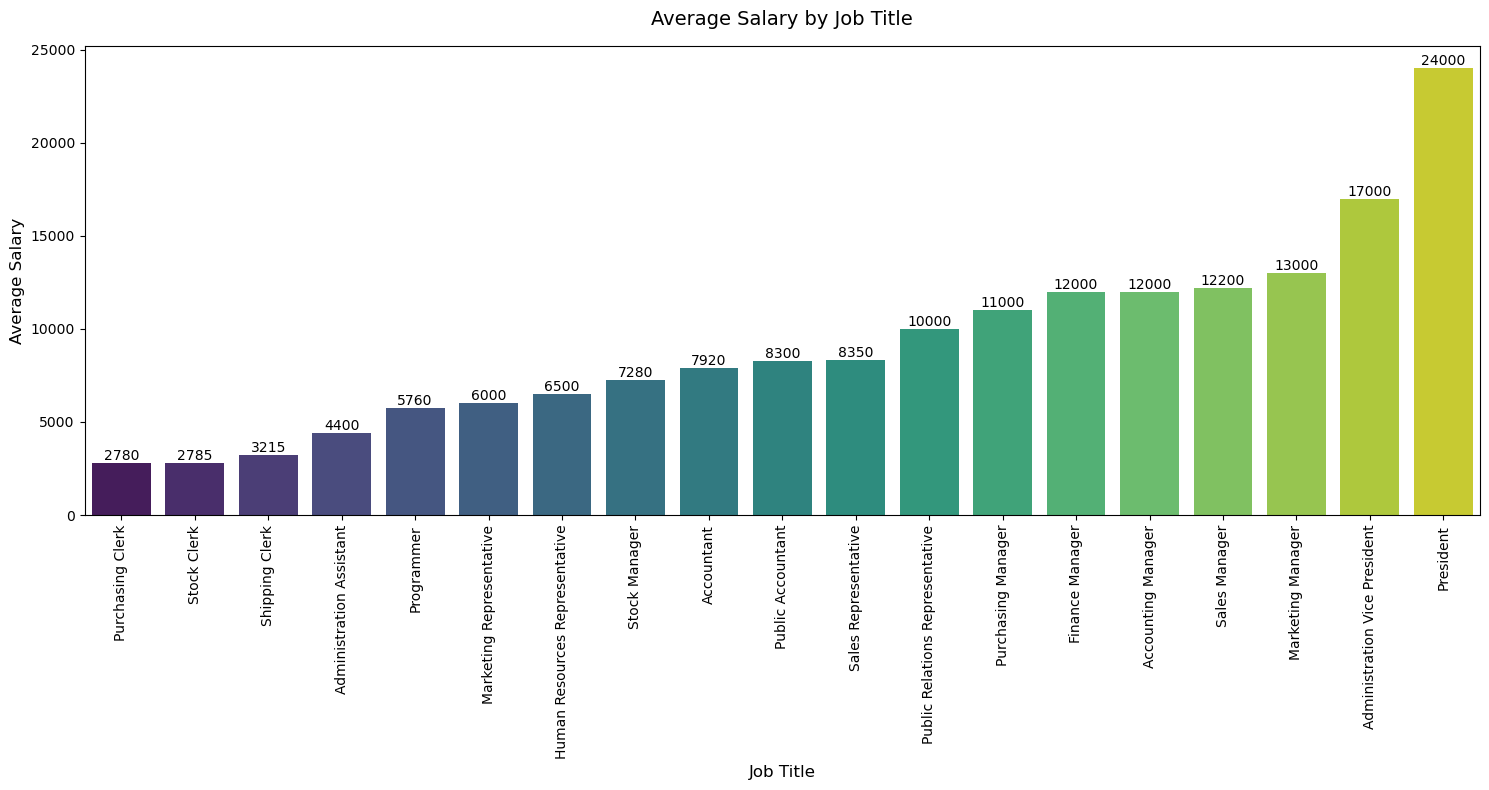

In [130]:
# Calculate average salary by job title
avg_salary_by_job = employeeRecordsDataframe.groupby('job_title')['salary'].mean().reset_index()

avg_salary_by_job = avg_salary_by_job.sort_values(by = 'salary', ascending = True)

# Plotting
plt.figure(figsize=(15, 8))
ax = sns.barplot(data=avg_salary_by_job, x='job_title', y='salary', palette='viridis')

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

plt.title('Average Salary by Job Title', weight = "light", fontsize = 14, pad = 15)
plt.xlabel('Job Title', fontsize = 12)
plt.ylabel('Average Salary', fontsize = 12)
plt.xticks(rotation=90)
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()

### Minimum Salary Category

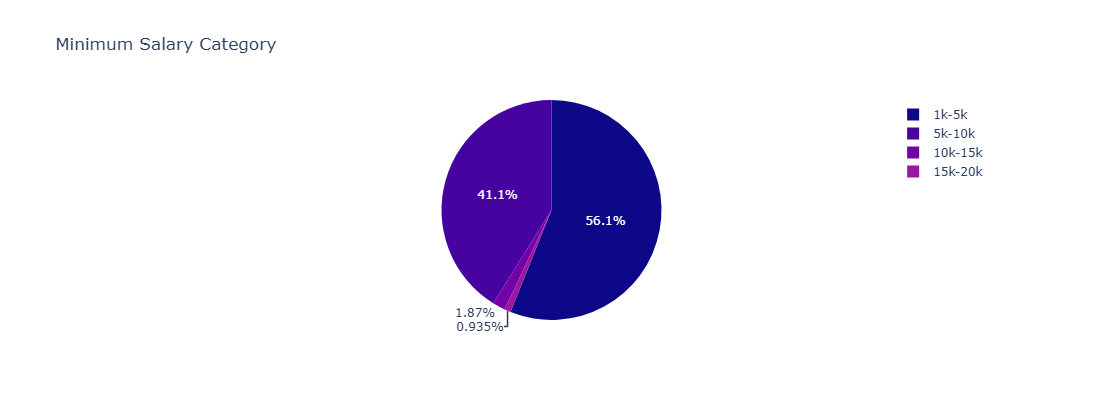

In [131]:

fig = pt.pie(data_frame = employeeRecordsDataframe, names = "Minimum Salary Category", color_discrete_sequence = pt.colors.sequential.Plasma,
             title = "Minimum Salary Category", hover_data = {"min_salary" : True}, width = 1000, height = 400)
fig.show()

### Maximum Salary Category

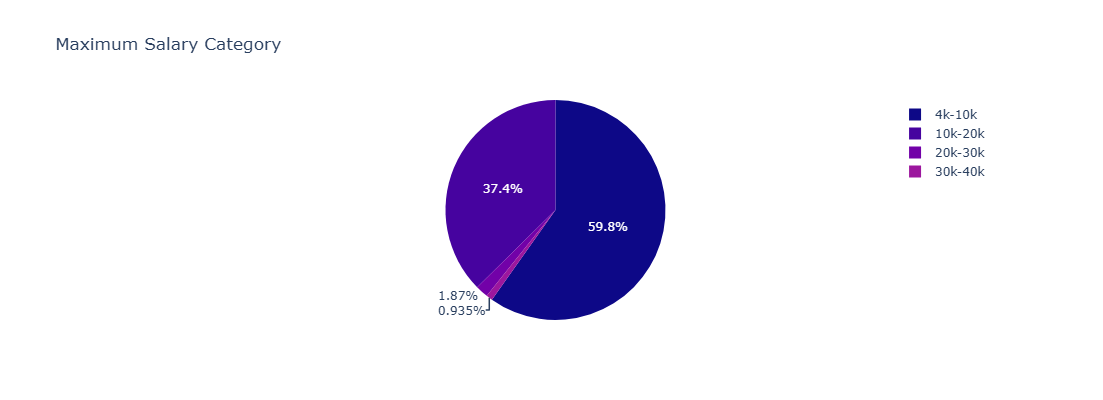

In [132]:

fig = pt.pie(data_frame = employeeRecordsDataframe, names = "Maximum Salary Category", color_discrete_sequence = pt.colors.sequential.Plasma,
             title = "Maximum Salary Category", hover_data = {'max_salary' : True}, width = 1000, height = 400)
fig.show()

### Proportion of Employees by Region

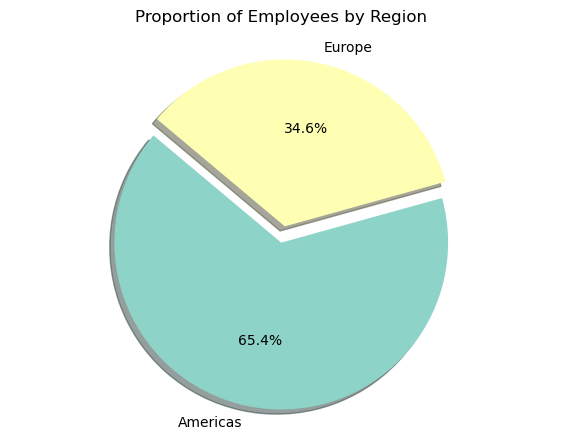

In [133]:
# Group the data by region and count the number of employees in each region
department_counts = employeeRecordsDataframe['region_name'].value_counts()

# Define a custom color palette (you can choose other palettes or define custom colors)
colors = plt.cm.Set3(range(len(department_counts)))

# Create the pie chart with custom colors, shadow, and exploded slices
plt.figure(figsize=(7, 5))
explode = [0.05] * len(department_counts)  # Slightly "explode" each slice for better emphasis
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Proportion of Employees by Region', pad = 15)

# Ensure the pie chart is circular
plt.axis('equal')  

# Show the plot
plt.show()

### One Sample t Test

In [134]:
hm = 6200

t_stat, p_value = ttest_1samp(employeeRecordsDataframe["salary"],hm) # p value
alpha = 0.05

# interpret the result
print(f"t-statistics: {t_stat}") 
print(f"p_value: {p_value}")

if p_value < alpha:
    print(f"reject the null hypothesis at alpha = {alpha}") 

else:
    print(f"fail to reject the null hypothesis at alpha = {alpha}")


t-statistics: 0.6924044320436438
p_value: 0.49019745449529095
fail to reject the null hypothesis at alpha = 0.05


- __Null Hypothesis (H₀):__ The mean salary of the employee is equal to $6,200
- __Alternative Hypothesis (H₁):__ The mean salary of the employee is different

Therefore, __fail to reject the null hypothesis (0.4 > 0.05)__ ( We don't have enough evidence to reject the null hypothesis)

### Two-Way Anova Test

In [35]:
data = employeeRecordsDataframe[['department_name', 'country_name', 'salary']]

model = ols('salary ~ C(department_name) + C(country_name) + C(department_name):C(country_name)', data = data).fit()

twoWayAnovaTable = round(sm.stats.anova_lm(model, typ = 2), 3)
print(twoWayAnovaTable)

                                          sum_sq    df       F  PR(>F)
C(department_name)                  1.008314e+09  10.0  24.848     0.0
C(country_name)                     1.041366e+09   3.0  85.541     0.0
C(department_name):C(country_name)  3.534159e+09  30.0  29.031     0.0
Residual                            3.855056e+08  95.0     NaN     NaN


C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 10, but rank is 6

C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

C:\Users\Logiya Vidhyapathy\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 30, but rank is 9



The Two-way ANOVA results indicate that there are no statistically significant interactions between department and country on salary.

- __Null Hypothesis (H₀):__ There is no significant interaction effect between department and country on salary.
- __Alternate Hypothesis (H₁):__ There is significant interaction effect between department and country on salary.

Therefore, we __reject the Null Hypothesis (0.0 < 0.05)__ (i.e. we have enough evidence to support the alternate hypothesis) 